In [28]:
import pandas as pd
import plotly.graph_objects as go

from plotnine import ggplot, aes, geom_boxplot, facet_grid, scale_fill_hue, theme_bw, geom_bar, geom_line, scale_y_continuous, labs
from plotnine import options

from pathlib import Path

In [2]:
OUTPUT_DIR = Path('./results-outputs')

## Load df

In [3]:
dfs = pd.DataFrame()

# Read all csv files in OUTPUT_DIR
for csv_path in OUTPUT_DIR.rglob('**/*.csv'):
    try:
        print(csv_path)
        df = pd.read_csv(csv_path)
        df.drop(['directory', 'START_TIME', 'END_TIME'], axis=1, inplace=True)
        df.fillna(0, inplace=True)
        dfs = pd.concat([dfs, df])
    except:
        pass

results-outputs/cpu.csv
results-outputs/gpu.csv


In [4]:
#sort the results by the column 'threads' and the PHASE
dfs.sort_values(by=['threads', 'PHASE'], inplace=True)

#print the phases unique
print(dfs['PHASE'].unique())

['P1 - TOTAL' 'P2 - FINAL PRODUCTS' 'P2 - H' 'P2 - PIXEL SELECTION'
 'P2 - RAH - H FINAL' 'P2 - RAH - PARALLEL - CORE'
 'P2 - RAH - PARALLEL - RAH FINAL' 'P2 - RAH - SERIAL - NDVI MIN & MAX'
 'P2 - RAH - SERIAL - RAH INITIAL' 'P2 - TOTAL'
 'out of memory in ./src/products.cu at line 538'
 'out of memory in ./src/products.cu at line 539'
 'out of memory in ./src/products.cu at line 540'
 'out of memory in ./src/products.cu at line 541'
 'out of memory in ./src/products.cu at line 533'
 'out of memory in ./src/products.cu at line 534'
 'out of memory in ./src/products.cu at line 535'
 'out of memory in ./src/products.cu at line 536'
 'out of memory in ./src/products.cu at line 537'
 'unknown error in ./src/products.cu at line 457'
 'CUDA-capable device(s) is/are busy or unavailable in ./src/products.cu at line 533'
 0]


In [5]:
# drop rows that not contains P1 or P2
dfs = dfs[dfs['PHASE'].str.contains('P1|P2') & dfs['PHASE'].notna()]
print(dfs['PHASE'].unique())

['P1 - TOTAL' 'P2 - FINAL PRODUCTS' 'P2 - H' 'P2 - PIXEL SELECTION'
 'P2 - RAH - H FINAL' 'P2 - RAH - PARALLEL - CORE'
 'P2 - RAH - PARALLEL - RAH FINAL' 'P2 - RAH - SERIAL - NDVI MIN & MAX'
 'P2 - RAH - SERIAL - RAH INITIAL' 'P2 - TOTAL']


In [22]:
df.head(5)

,threads,device,PHASE,TIMESTAMP,CPU_MIN,CPU_MAX,CPU_MEAN,MEM_CPU_MIN,MEM_CPU_MAX,MEM_CPU_MEAN,GPU_MIN,GPU_MAX,GPU_MEAN,MEM_GPU_MIN,MEM_GPU_MAX,MEM_GPU_MEAN
0,01t,gpu,P2 - RAH - PARALLEL - CORE,1937.0,94.0,99.0,97.000000,15280.0,15560.0,15390.000000,19.0,100.0,49.666667,0.0,3512.0,2341.333333
1,01t,gpu,P2 - RAH - PARALLEL - CORE,1786.0,94.0,99.0,96.666667,15510.0,15560.0,15543.333333,0.0,100.0,43.333333,3512.0,3512.0,3512.000000
2,01t,gpu,P1 - TOTAL,37471.0,98.0,101.0,99.632105,630.0,14900.0,10457.631579,0.0,0.0,0.000000,0.0,0.0,0.000000
3,01t,gpu,P2 - PIXEL SELECTION,47505.0,91.0,100.0,98.854167,13820.0,15980.0,15838.958333,0.0,0.0,0.000000,0.0,0.0,0.000000
4,01t,gpu,P2 - RAH - SERIAL - NDVI MIN & MAX,189.0,99.0,100.0,99.500000,13820.0,13970.0,13895.000000,0.0,0.0,0.000000,0.0,0.0,0.000000


In [24]:
#select the row where the CPU_MAX is 1028.0

dfs[dfs['CPU_MAX'] == 1028.0]

,threads,device,PHASE,TIMESTAMP,CPU_MIN,CPU_MAX,CPU_MEAN,MEM_CPU_MIN,MEM_CPU_MAX,MEM_CPU_MEAN,GPU_MIN,GPU_MAX,GPU_MEAN,MEM_GPU_MIN,MEM_GPU_MAX,MEM_GPU_MEAN
19,01t,gpu,P2 - PIXEL SELECTION,47789.0,96.0,1028.0,172.777778,0.0,17670.0,16438.055556,0.0,1.0,0.027778,0.0,0.0,0.0
15,01t,gpu,P2 - TOTAL,67333.0,96.0,1028.0,172.777778,0.0,17670.0,16438.055556,0.0,1.0,0.027778,0.0,0.0,0.0
1234,16t,cpu,P2 - H,3096.0,396.0,1028.0,799.250000,15490.0,15490.0,15490.000000,NaN,NaN,NaN,NaN,NaN,NaN
1242,16t,cpu,P2 - RAH - PARALLEL - CORE,695.0,396.0,1028.0,712.000000,15490.0,15490.0,15490.000000,NaN,NaN,NaN,NaN,NaN,NaN
1237,16t,cpu,P2 - RAH - PARALLEL - RAH FINAL,1625.0,396.0,1028.0,712.000000,15490.0,15490.0,15490.000000,NaN,NaN,NaN,NaN,NaN,NaN
1238,16t,cpu,P2 - RAH - SERIAL - RAH INITIAL,1148.0,991.0,1028.0,1009.500000,15490.0,15490.0,15490.000000,NaN,NaN,NaN,NaN,NaN,NaN
1232,16t,cpu,P2 - TOTAL,53223.0,97.0,1028.0,150.054909,15490.0,17670.0,17255.818182,NaN,NaN,NaN,NaN,NaN,NaN


## Plots

In [7]:
gg_df = dfs[dfs['PHASE'].str.contains('PARALLEL')]

### Speedup

In [8]:
speedup = list()
for threads in gg_df['threads'].unique():
    for phase in gg_df['PHASE'].unique():
        for device in gg_df['device'].unique():
            threads_num = int(threads.split('t')[0])
            seq_time = gg_df[(gg_df['threads'] == '01t') &
                             (gg_df['PHASE'] == phase) &
                             (gg_df['device'] == device)]['TIMESTAMP'].median()

            current_time = gg_df[(gg_df['threads'] == threads) &
                                 (gg_df['PHASE'] == phase) &
                                 (gg_df['device'] == device)]['TIMESTAMP'].median()

            speedup.append({
                'PHASE': phase,
                'device': device,
                'threads': threads_num,
                'ideal_time': seq_time / threads_num,
                'real_time': current_time,
                'speedup': seq_time / current_time,
            })

speedup_df = pd.DataFrame(speedup)
speedup_df.sort_values(by=['device', 'PHASE', 'threads'], inplace=True)
speedup_df.head(5)

,PHASE,device,threads,ideal_time,real_time,speedup
0,P2 - RAH - PARALLEL - CORE,cpu,1,7308.00,7308.0,1.000000
4,P2 - RAH - PARALLEL - CORE,cpu,2,3654.00,2147.5,3.403027
8,P2 - RAH - PARALLEL - CORE,cpu,4,1827.00,1177.5,6.206369
12,P2 - RAH - PARALLEL - CORE,cpu,8,913.50,1196.5,6.107814
16,P2 - RAH - PARALLEL - CORE,cpu,16,456.75,682.0,10.715543


/home/clsmfm/.virtualenvs/main/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:98: PlotnineWarning: geom_path: Removed 5 rows containing missing values.
/home/clsmfm/.virtualenvs/main/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:111: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


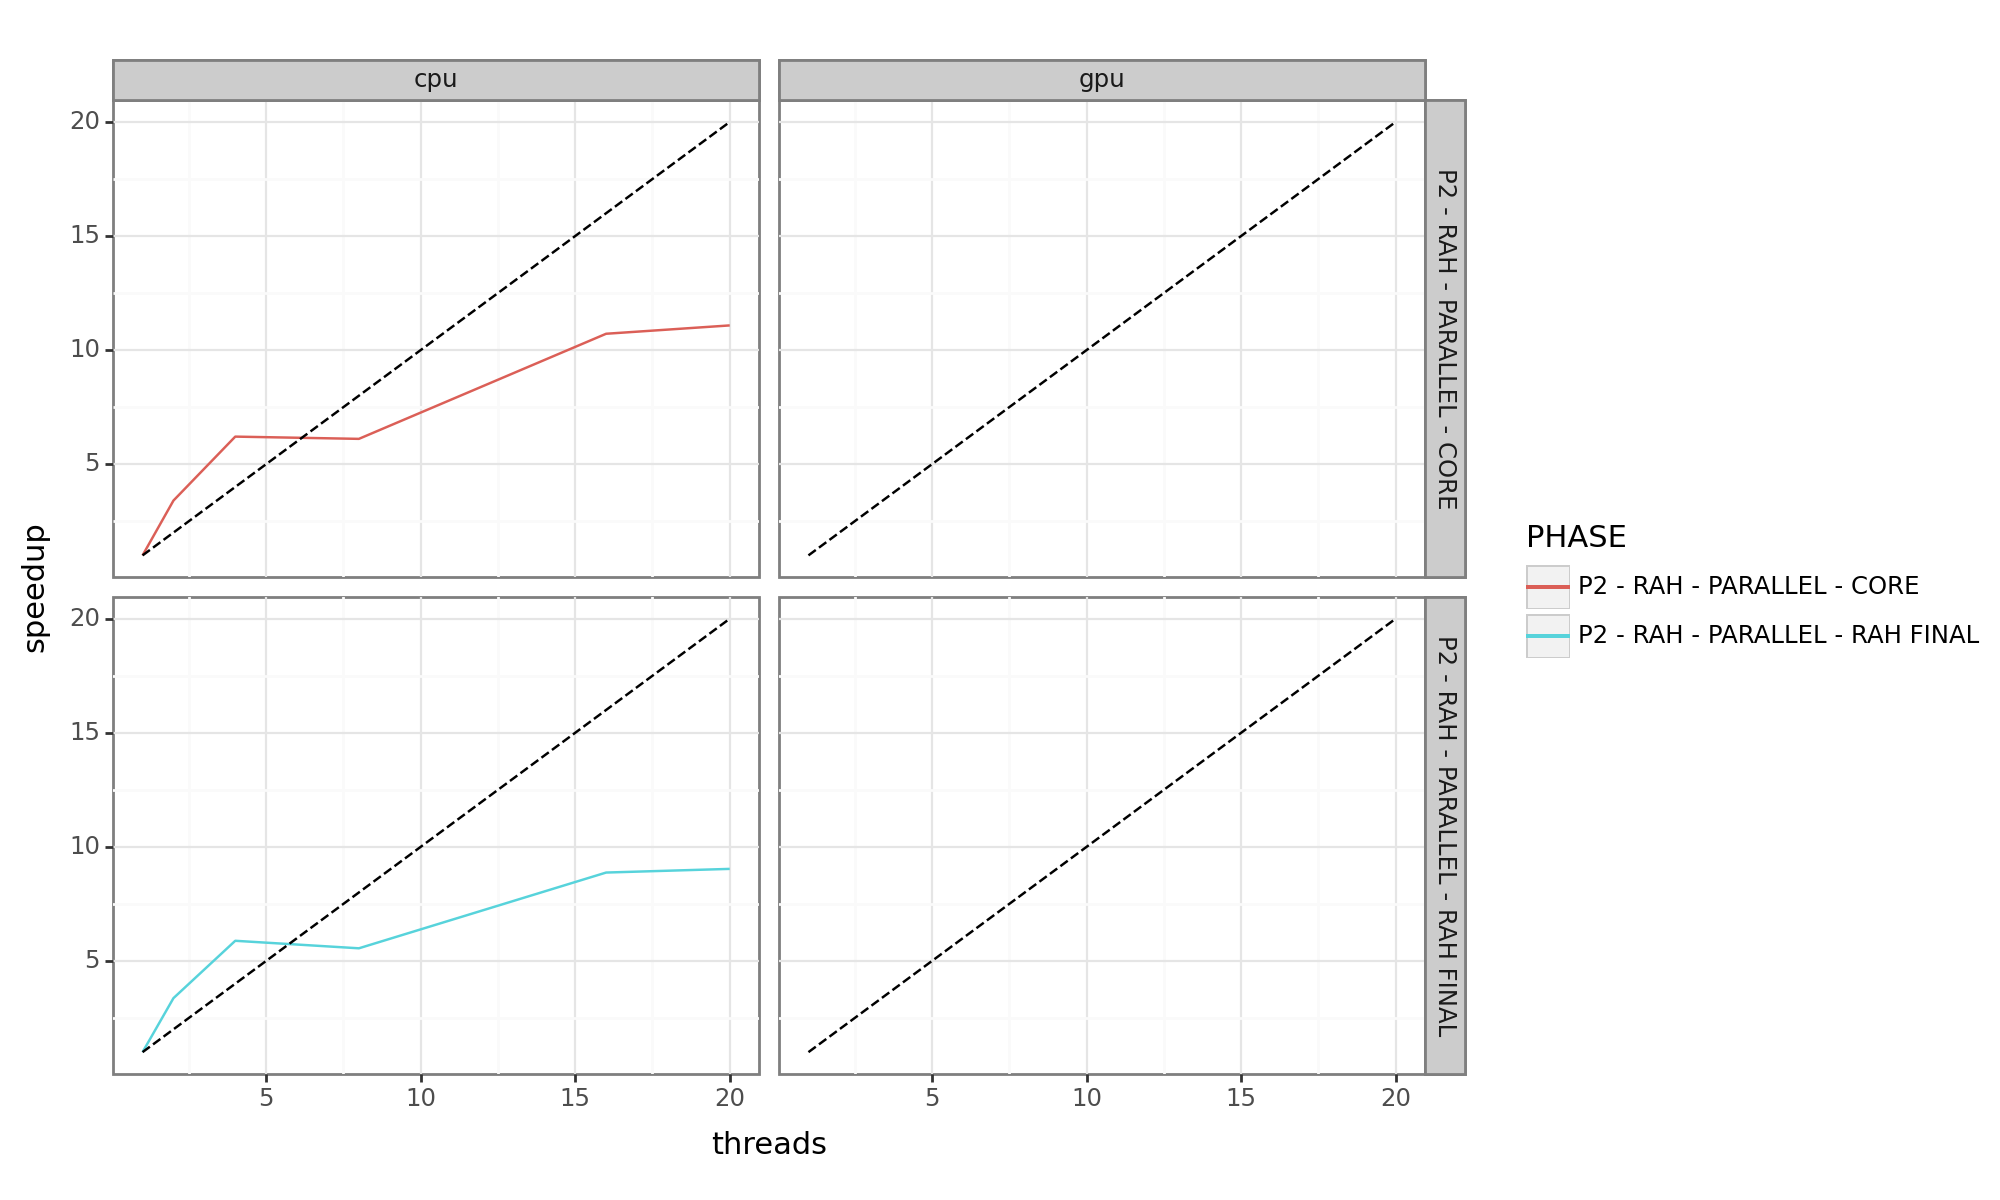

<Figure Size: (1000 x 600)>

In [9]:
options.figure_size = (10, 6)

(ggplot(speedup_df, aes(x='threads', y='speedup', color='PHASE'))
 + geom_line()
 + geom_line(aes(x='threads', y='threads'), linetype='dashed', color='black')
 + facet_grid("PHASE ~ device")
 + labs(x="Threads", y="Speedup")
 + theme_bw())

### Timestamp

/home/clsmfm/.virtualenvs/main/lib/python3.10/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


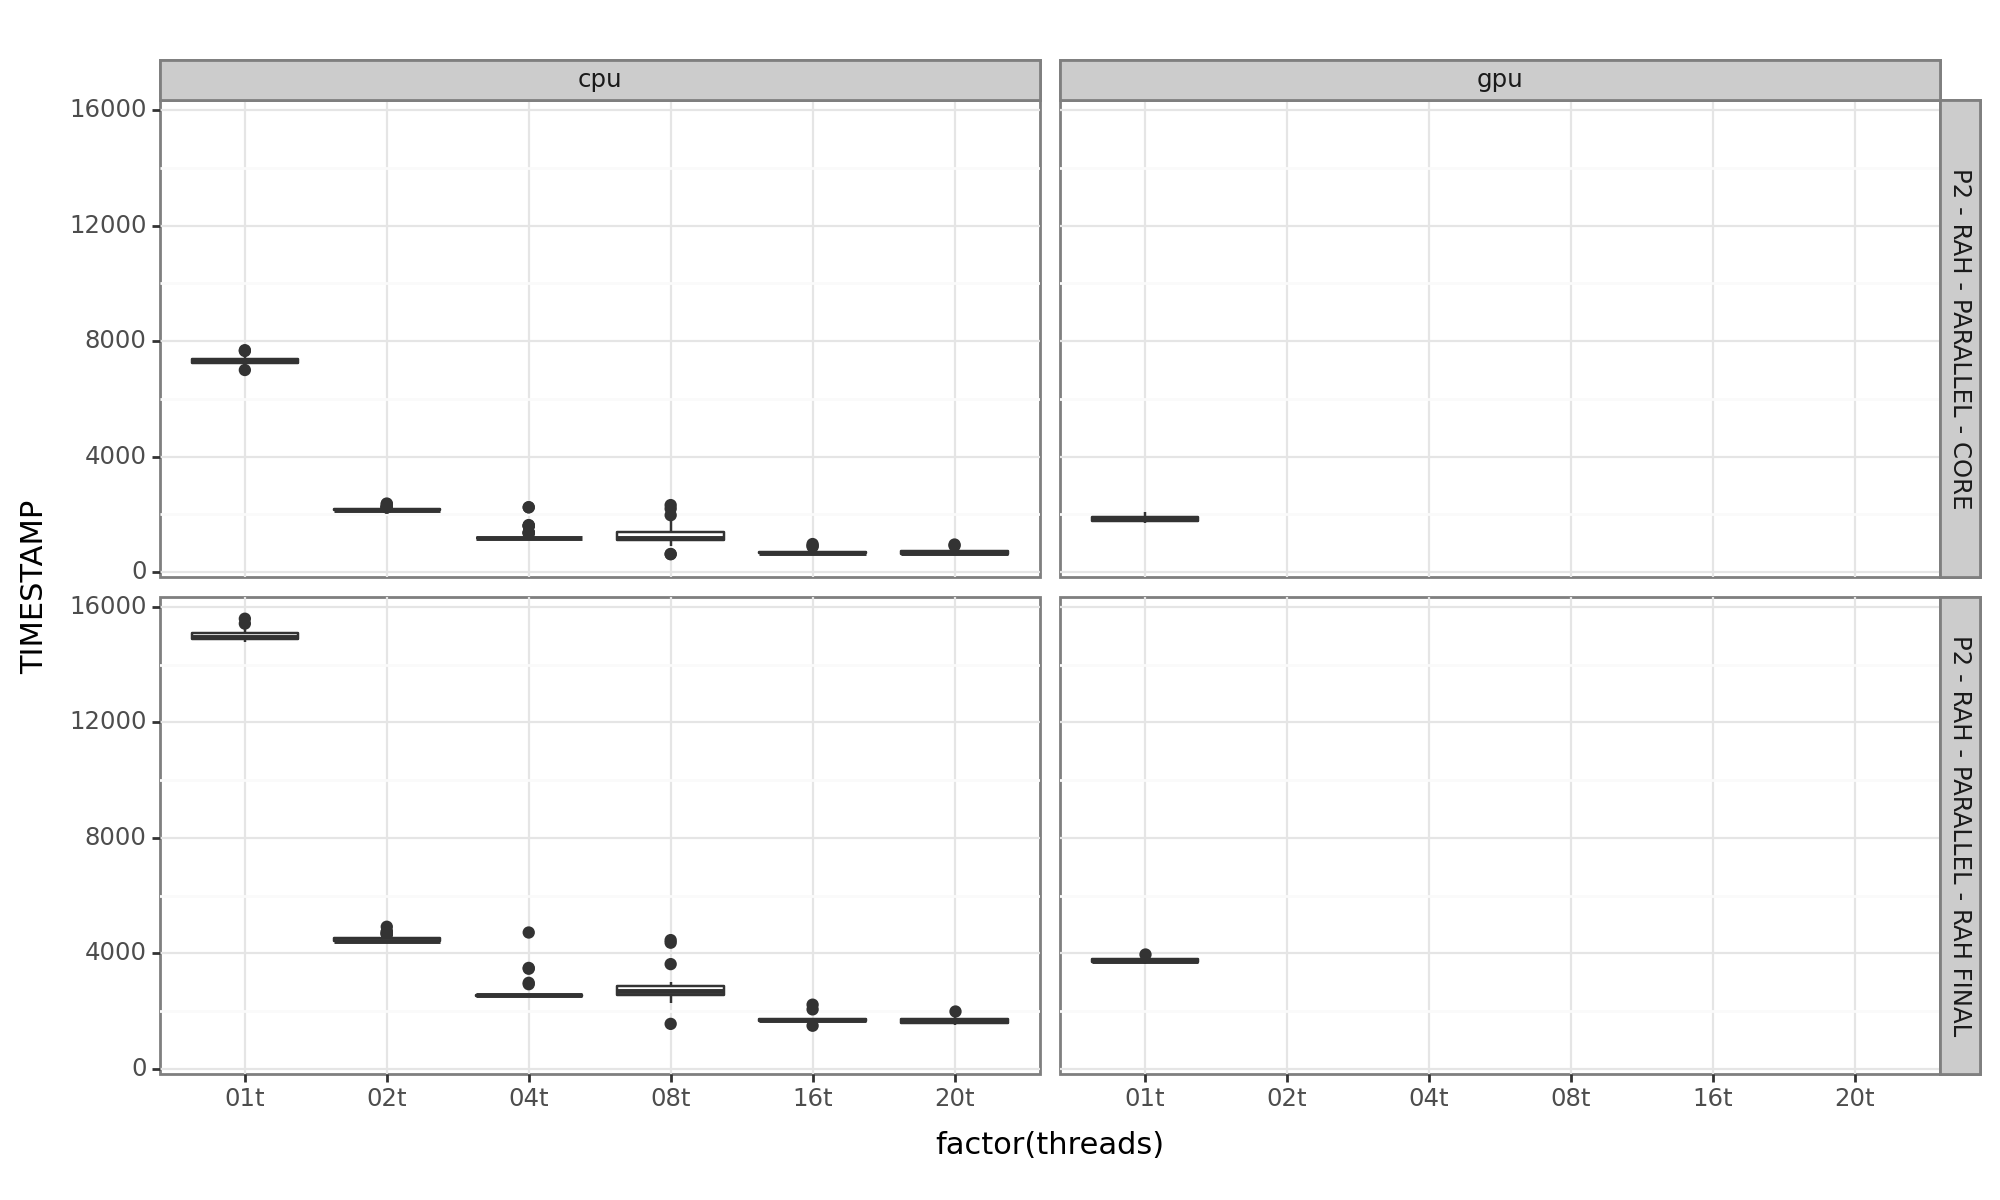

<Figure Size: (1000 x 600)>

In [10]:
options.figure_size = (10, 6)
(ggplot(gg_df, aes(x='factor(threads)', y='TIMESTAMP'))
 + geom_boxplot()
 + facet_grid("PHASE ~ device")
 + scale_fill_hue()
 + labs(x="Threads", y="Timestamp (ms)")
 + theme_bw())

/home/clsmfm/.virtualenvs/main/lib/python3.10/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


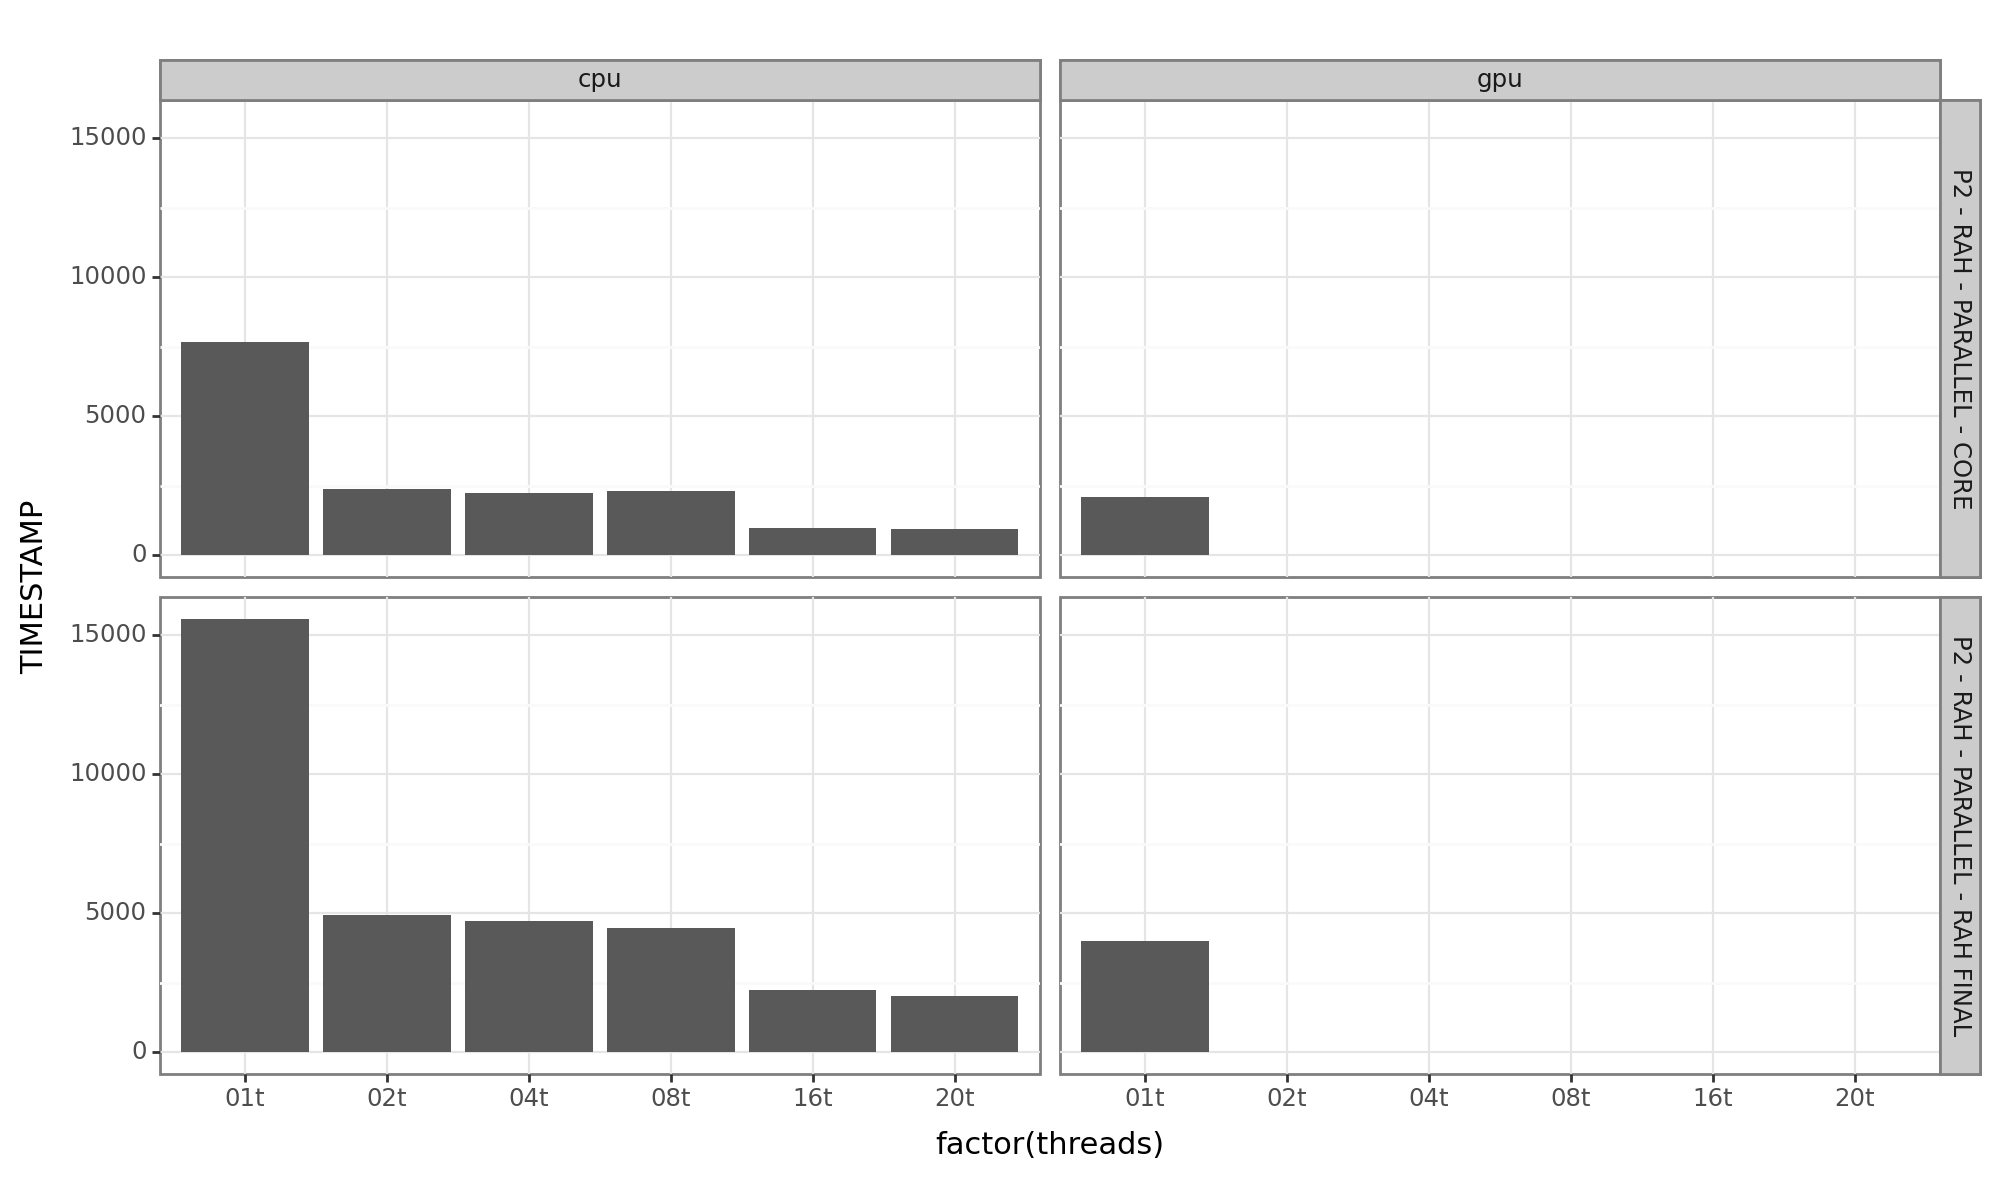

<Figure Size: (1000 x 600)>

In [11]:
options.figure_size = (10, 6)

(ggplot(gg_df, aes(x='factor(threads)', y='TIMESTAMP'))
 + geom_bar(stat='identity', position='dodge')
 + facet_grid("PHASE ~ device")
 + scale_fill_hue()
 + labs(x="Threads", y="Timestamp (ms)")
 + theme_bw())

### CPU usage

/home/clsmfm/.virtualenvs/main/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning:

geom_bar : Removed 1269 rows containing missing values.



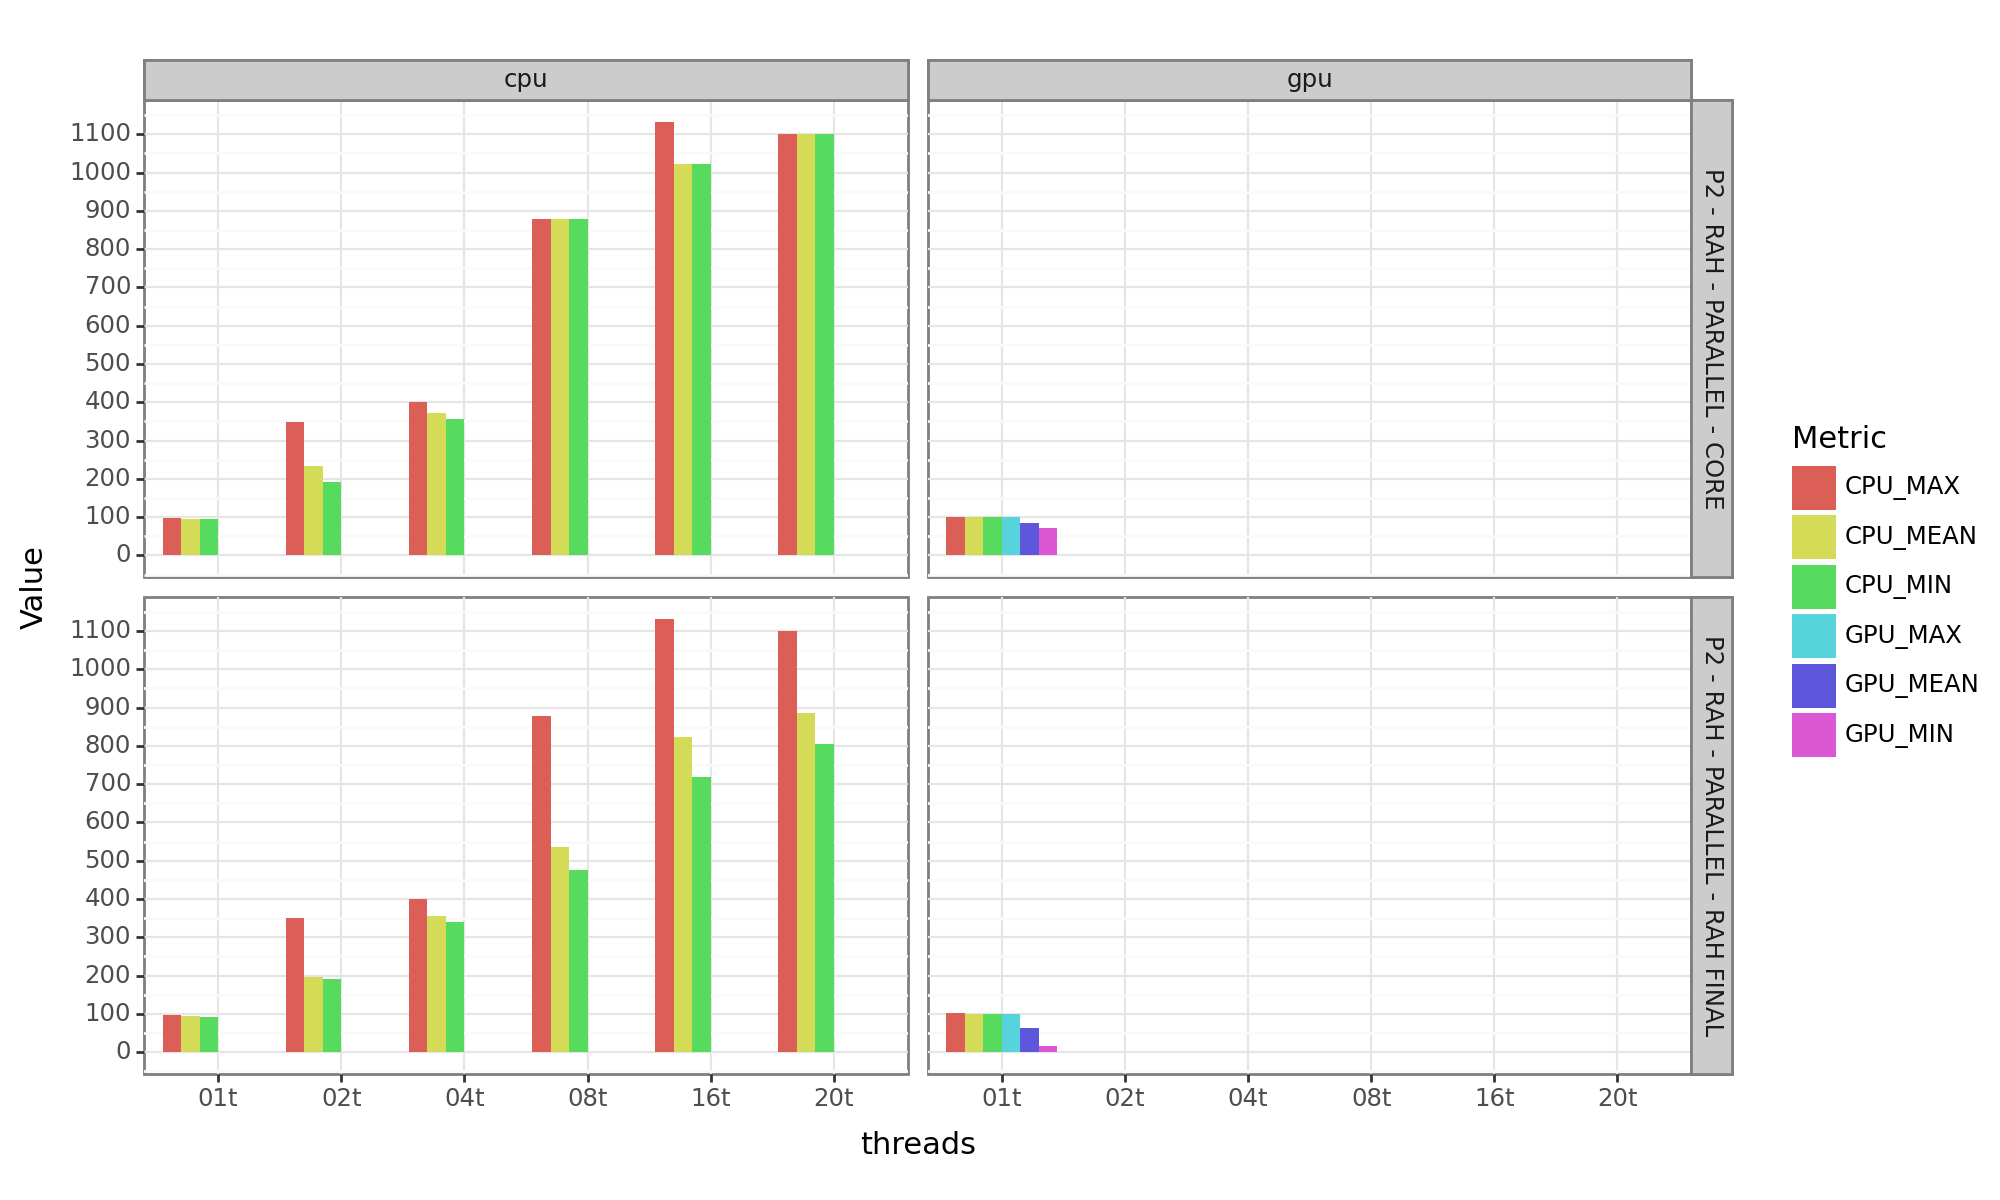

<Figure Size: (1000 x 600)>

In [26]:
options.figure_size = (10, 6)

df_selected = gg_df[['threads', 'device', 'PHASE', 'GPU_MAX', 'GPU_MEAN', 'GPU_MIN', 'CPU_MAX', 'CPU_MEAN', 'CPU_MIN']]
df_melted = pd.melt(df_selected, id_vars=['threads', 'PHASE', 'device'], var_name='Metric', value_name='Value')

(ggplot(df_melted, aes(x='threads', y='Value', fill='Metric'))
 + geom_bar(stat='identity', position='dodge')
 + facet_grid("PHASE ~ device")
 + scale_y_continuous(breaks=range(0, int(df_melted['Value'].max()) + 100, 100))
 + labs(x="Threads", y="Processor Usage (%)")
 + scale_fill_hue()
 + theme_bw())

### Memory usage

/home/clsmfm/.virtualenvs/main/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning:

geom_bar : Removed 1269 rows containing missing values.



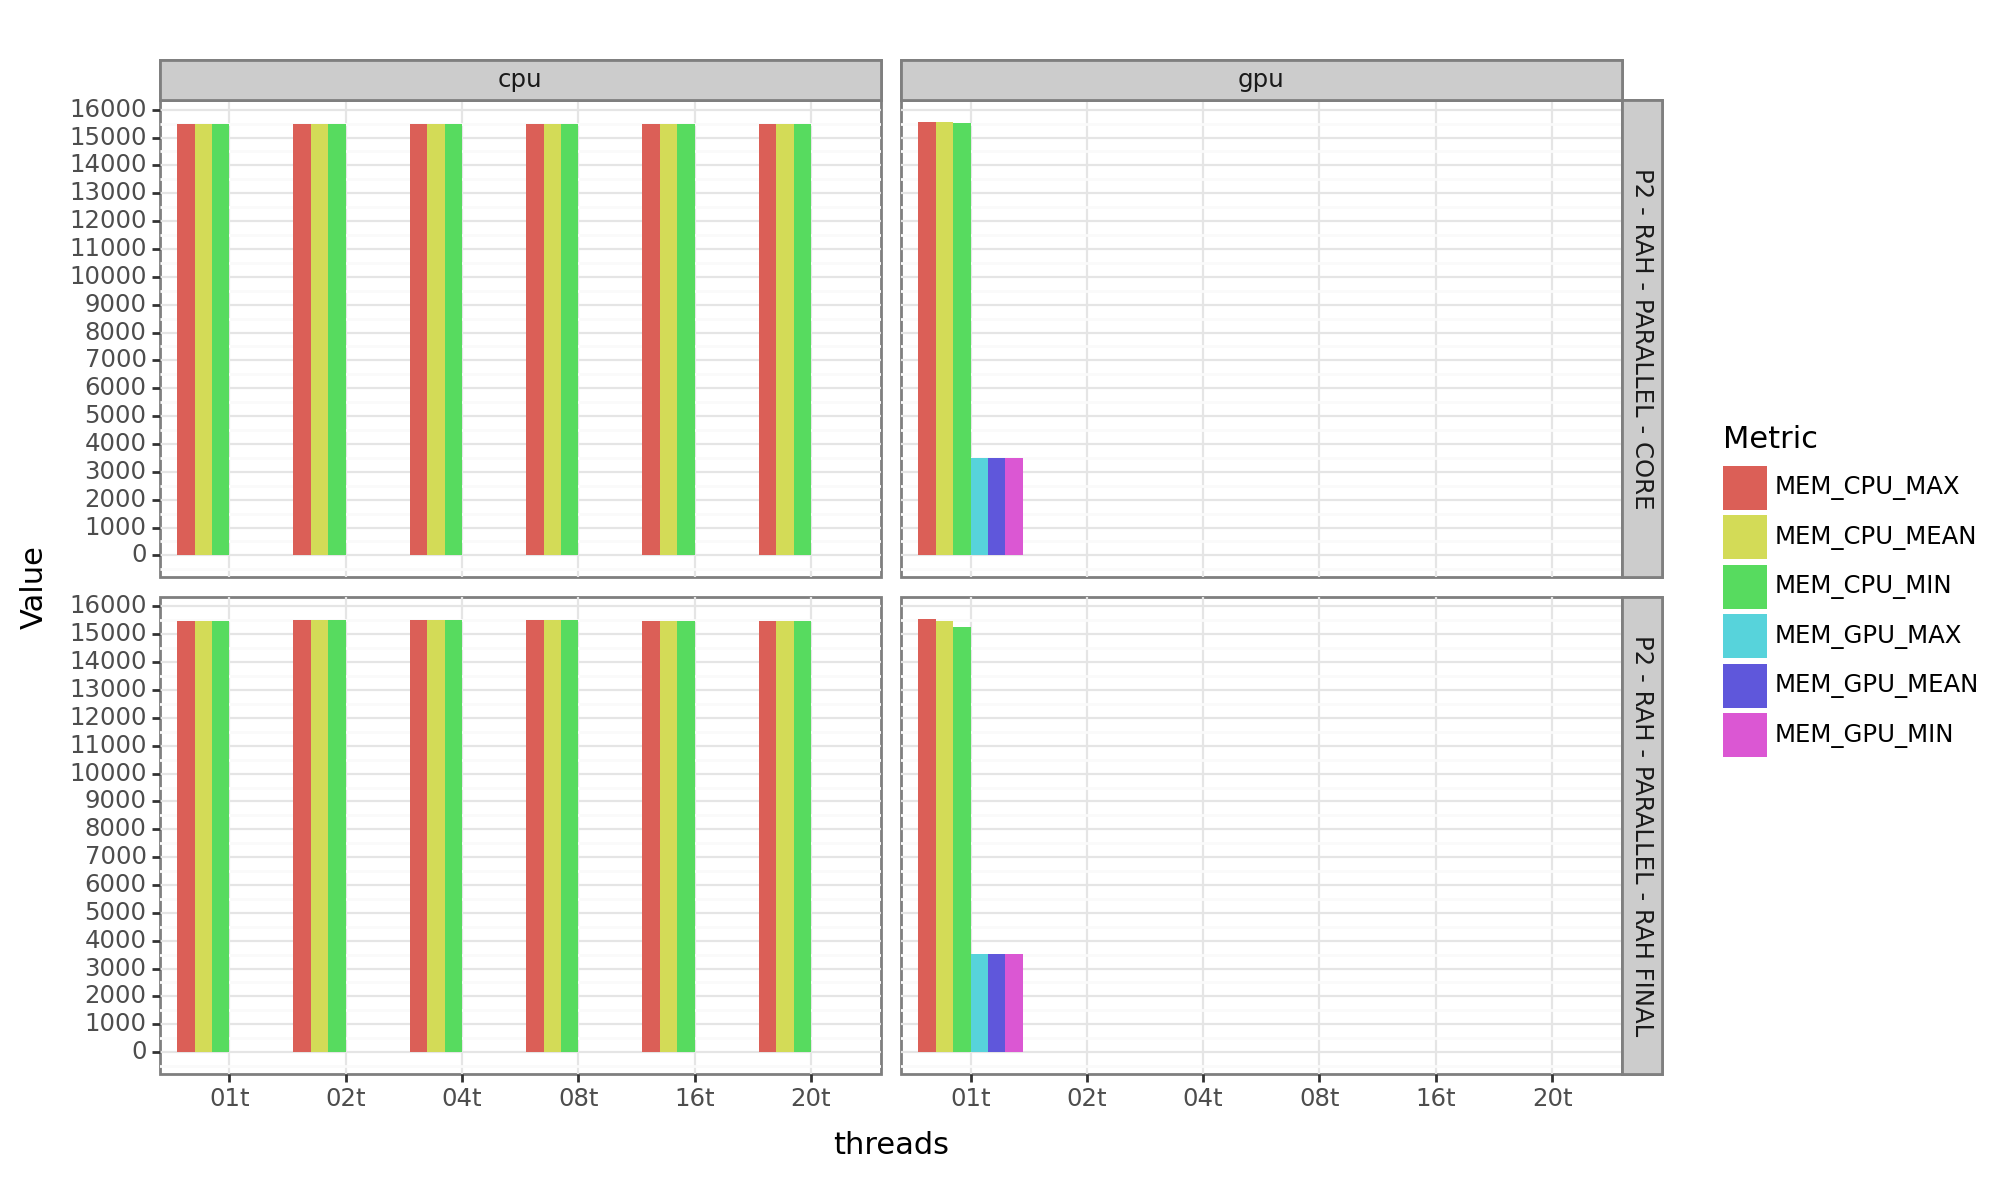

<Figure Size: (1000 x 600)>

In [27]:
options.figure_size = (10, 6)

df_selected = gg_df[['threads', 'device', 'PHASE', 'MEM_GPU_MAX', 'MEM_GPU_MEAN', 'MEM_GPU_MIN', 'MEM_CPU_MAX', 'MEM_CPU_MEAN', 'MEM_CPU_MIN']]
df_melted = pd.melt(df_selected, id_vars=['threads', 'PHASE', 'device'], var_name='Metric', value_name='Value')

(ggplot(df_melted, aes(x='threads', y='Value', fill='Metric'))
 + geom_bar(stat='identity', position='dodge')
 + facet_grid("PHASE ~ device")
 + scale_y_continuous(breaks=range(0, int(df_melted['Value'].max()) + 1000, 1000))
 + labs(x='Number of threads', y='Memory Usage (MB)')
 + scale_fill_hue()
 + theme_bw())

## Interactive

In [18]:
def plot_per_phase(df, title, y_title, x_title, col):
    fig = go.Figure()

    for thread in df['threads'].unique():
        for device in df['device'].unique():
            filtered_df = df[(df['threads'] == thread) & (df['device'] == device)]
            
            fig.add_trace(go.Box(
                y=filtered_df[col],
                x=filtered_df['PHASE'],
                name=f'{device} - {thread}'
            ))

    fig.update_layout(
        width=1000,
        title=title,
        yaxis_title=y_title,
        xaxis_title=x_title,
        boxmode='group' # group together boxes of the different traces for each value of x
    )

    fig.show()

In [19]:
plot_per_phase(dfs, "Phases timestamp", "Time (ms)", "phase", "TIMESTAMP")